# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.core import datetools
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [ ]:
#function

In [6]:
print df_raw.describe() 

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of scores between the max(800) and min(220) of GRE scores is more spread out than the range of possible GPA scores (2.26-4), so we would expect the STD of the GRE is higher.

#### Question 4. Drop data points with missing data


In [7]:
#Replace all missing values with NaN except for 'admit' column
df_raw[['gre','gpa','prestige']] = df_raw[['gre','gpa','prestige']].replace(0,np.NaN)

In [8]:
#Drop the missing data in all the columns except for the 'admit' column.
df_raw.dropna(subset = ['admit','gre', 'gpa', 'prestige'])

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The number of rows in our dataset for the three subsets or columns GRE, GPA and Prestige is 397.  When we dropped the missing data, it only removed 3 rows.  However, we had 5 missing cells, so now we need to check if some of the rows had more than one missing cell. 

In [9]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [10]:
#Counts how many null values are in a row, and prints the row # where count is >=1.
np.where(df_raw.isnull().sum(axis=1)>=1)

(array([187, 212, 236]),)

In [11]:
df_raw = df_raw[np.isfinite(df_raw['gre'])]

In [12]:
df_raw = df_raw[np.isfinite(df_raw['gpa'])]

In [13]:
df_raw = df_raw[np.isfinite(df_raw['prestige'])]

In [14]:
#Confirms 3 rows were dropped, 1 with NaN and 2 with NaNs.
df_raw.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA

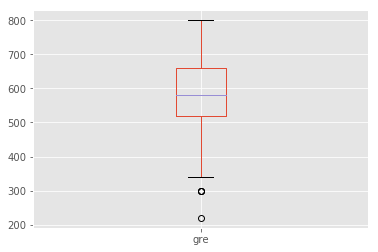

In [16]:
#boxplot 1
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
df_raw.boxplot('gre')

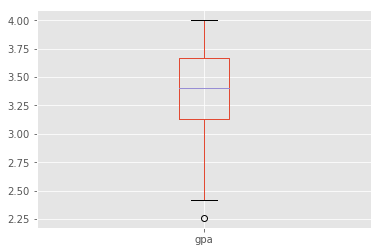

In [17]:
#boxplot 2 
df_raw.boxplot('gpa')

#### Question 7. What do this plots show?

Answer: These plots show the distribution of observations from the dataset of the gre and gpa column.  There are a couple of outliers in gre, and one in gpa.  The min in gre is 340 (220 and outlier), max is 800, 1st quartile is 520, 3rd quartile is 660, with a mean of 588. The min of gpa is 2.42,(actual min 2.26 is an outlier), 1st first quartile is 340, 3rd quartile 3.67, mean of 3.39.

#### Question 8. Describe each distribution 

admit
0    [[Axes(0.125,0.551739;0.336957x0.328261), Axes...
1    [[Axes(0.125,0.551739;0.336957x0.328261), Axes...
dtype: object

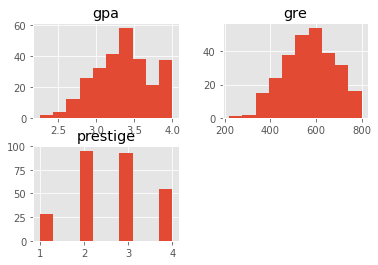

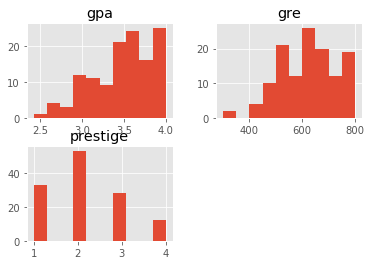

In [18]:
# plot the distribution of each variable 
df_raw.groupby('admit').hist()

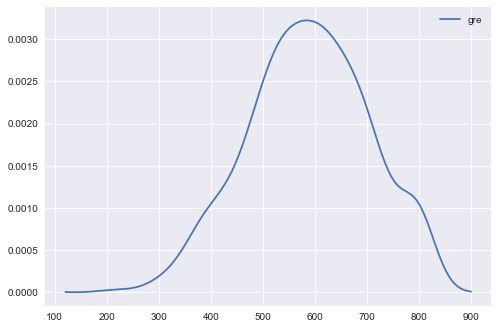

In [19]:
import seaborn as sns
sns.kdeplot(df_raw['gre'])

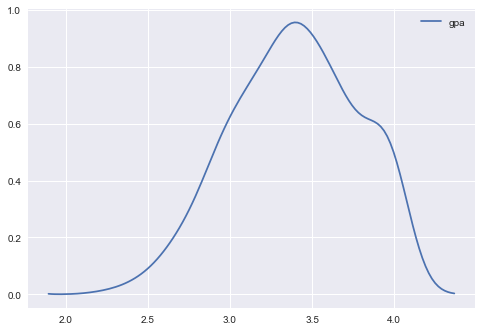

In [20]:
sns.kdeplot(df_raw['gpa'])

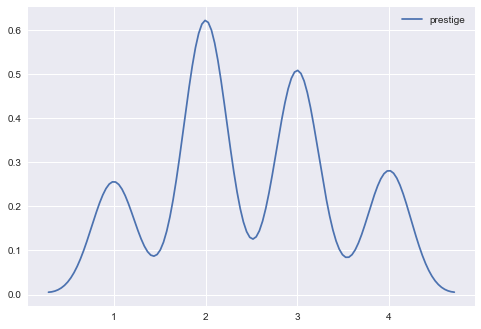

In [21]:
sns.kdeplot(df_raw['prestige'])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, it is skewed to the right for gpa and gre, which represents the higher scores for each were admitted.  And it is skewed to the left for prestige which means those with higher ranked alma maters were more likely to be admitted.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, prestige should be converted to something easier to manipulate.  Dummy variables could be created to convert the prestige rank into something more quantifiable such as gre or gpa.  

#### Question 11. Which of our variables are potentially colinear? 

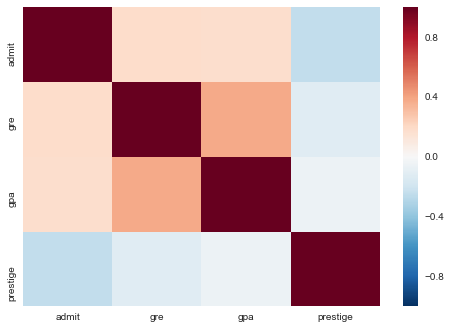

In [22]:
# create a correlation matrix for the data
import seaborn as sns
corr = df_raw.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Question 12. What did you find?

Answer: GPA and GRE are potentially collinear.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Create categorical variables using 0s and 1s to change the rank, create a new data frame that incorporates this change, add an intercept, log transform skewed data and impute missing data for the rows that were dropped.

#### Question 14. What is your hypothesis? 

Answer: The probability of getting admitted to a graduate school is directly related to how highly ranked your undergraduate school is.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [ ]:
#Alternative 1
sum([True for idx,row in df_raw.iterrows() if any(row.isnull())])

In [ ]:
#Alternative 2
df_raw.dropna(axis=0, how='any')

#### 2. Bonus: Log transform the skewed data

In [23]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn import preprocessing
from scipy.stats import skew

In [24]:
df_raw['gre'].fillna(0,inplace=True)
df_raw['gpa'].fillna(0,inplace=True)
df_raw['prestige'].fillna(0,inplace=True)

In [25]:
admit=preprocessing.scale(df_raw['gre'])
skness=skew(admit)

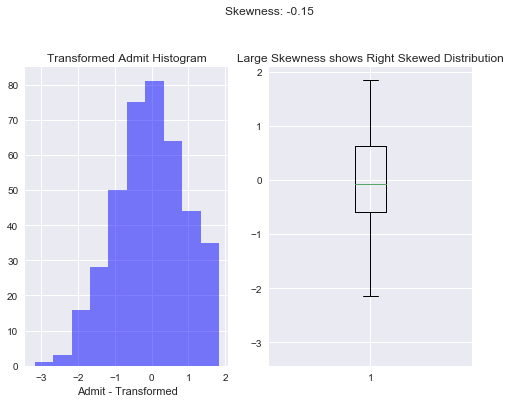

In [26]:
figure = plt.figure()
figure.add_subplot(121)   
plt.hist(admit,facecolor='blue',alpha=0.5) 
plt.xlabel("Admit - Transformed") 
plt.title("Transformed Admit Histogram") 
plt.text(2,100,"Skewness: {0:.2f}".format(skness)) 

figure.add_subplot(122) 
plt.boxplot(admit)
plt.title("Large Skewness shows Right Skewed Distribution")
plt.show()

#### 3. Advanced: Impute missing data

In [ ]:
>>> import numpy as np
>>> from sklearn.preprocessing import Imputer
>>> imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
>>> imp.fit([[1, 2], [np.nan, 3], [7, 6]])
Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)
>>> X = [[np.nan, 2], [6, np.nan], [7, 6]]
>>> print(imp.transform(X))                           
[[ 4.          2.        ]
 [ 6.          3.666...]
 [ 7.          6.        ]]